# Programmer
# Miralireza Nabavi

In [12]:
### basic imports 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import seaborn as sns; sns.set()

### random number generator
from numpy.random import default_rng

### sklearn model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

def myrmse(y,yhat):
   """ print out rmse with 3 digits"""
   rmse = math.sqrt(mean_squared_error(y,yhat))
   return(np.round(rmse,3))

In [13]:
### data
cadat = pd.read_csv("calhouse.csv")
n = cadat.shape[0] #sample size
p = cadat.shape[1]-1
y = cadat['logMedVal'].to_numpy()
x = cadat.iloc[:,:9].to_numpy()
print('n,p: ',n,p)

n,p:  20640 9


In [3]:
cadat.head()

,longitude,latitude,housingMedianAge,population,households,medianIncome,AveBedrms,AveRooms,AveOccupancy,logMedVal
0,-122.23,37.88,41,322,126,8.3252,1.023810,6.984127,2.555556,13.022764
1,-122.22,37.86,21,2401,1138,8.3014,0.971880,6.238137,2.109842,12.789684
2,-122.24,37.85,52,496,177,7.2574,1.073446,8.288136,2.802260,12.771671
3,-122.25,37.85,52,558,219,5.6431,1.073059,5.817352,2.547945,12.740517
4,-122.25,37.85,52,565,259,3.8462,1.081081,6.281853,2.181467,12.743151


In [4]:
cadat.shape

(20640, 10)

In [5]:
### train, val, test
rng = np.random.default_rng(seed=34) 
ii = rng.choice(range(n),size=n,replace=False)

n1 = math.floor(n/2.0) # half the data in train
n2 = math.floor(n/4.0) # quarter of the data in train
n3 = n-n1-n2
ii1 = ii[:n1]; x1 = x[ii1]; y1 = y[ii1] #train
ii2 = ii[n1 + np.arange(n2)]; x2 = x[ii2]; y2 = y[ii2] #val
ii3 = ii[n1 + n2 + np.arange(n3)]; x3 = x[ii3]; y3 = y[ii3] #test

## let's test that the train/val/test split worked by recombining and comparing
# regression results
lmf = LinearRegression()
lmf.fit(x,y)
print(lmf.coef_)
xx = np.vstack([x1,x2,x3]); yy = np.concatenate([y1,y2,y3])
lmf.fit(xx,yy)
print(lmf.coef_)

[-2.79811314e-01 -2.84937905e-01  3.25464405e-03 -1.89041370e-04
  6.47108158e-04  1.76501507e-01  1.43352635e-01 -1.34291360e-02
  4.92079224e-04]
[-2.79811314e-01 -2.84937905e-01  3.25464405e-03 -1.89041370e-04
  6.47108158e-04  1.76501507e-01  1.43352635e-01 -1.34291360e-02
  4.92079224e-04]


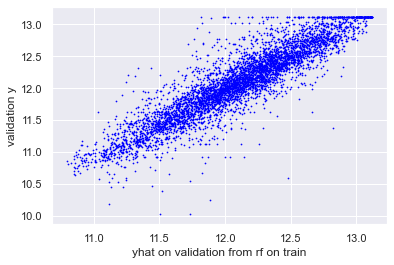

rmse from rf, fit on train, predict on val:  0.24


In [6]:
## fit rf on train, predict on val
# use 500 trees and 3 x's
rfm = RandomForestRegressor(random_state=0,n_jobs=-1,n_estimators=500,max_features=3)
rfm.fit(x1,y1) # fit on train
## predict on val
yhrf = rfm.predict(x2)

plt.scatter(yhrf,y2,c='blue',s=.5)
plt.xlabel('yhat on validation from rf on train');plt.ylabel('validation y')
plt.show()

print('rmse from rf, fit on train, predict on val: ',myrmse(y2,yhrf))

In [11]:
### let's fit RF on train+val, predict on test

## use train and val data
rfm.fit(x1,y1)
yhrf3 = rfm.predict(x3)
print('rmse on test from gradient boosting: ',myrmse(y3,yhrf3))

rmse on test from gradient boosting:  0.24


variables in order of importance: ['medianIncome' 'latitude' 'longitude' 'AveOccupancy' 'AveRooms'
 'housingMedianAge' 'AveBedrms' 'households' 'population']


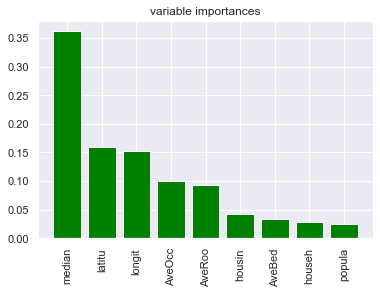

In [8]:
### important features from Random Forests

## use train and val data
x12 = np.vstack([x1,x2]); y12 = np.concatenate([y1,y2])
rfm.fit(x12,y12)

## variable importances
fimp = rfm.feature_importances_
iifi = np.argsort(fimp)[::-1] #order (max first) of feature importances
fnms = cadat.iloc[:,:9].columns.values #feature names
print("variables in order of importance:",fnms[iifi])

## plot variable importances
fnmS = np.array([fnms[i][:6] for i in range(p)]) #truncate names so the fit in plot
plt.bar(range(p),fimp[iifi],color='green')
plt.xticks(range(p),fnmS[iifi],rotation=90)
plt.title('variable importances')
plt.show()

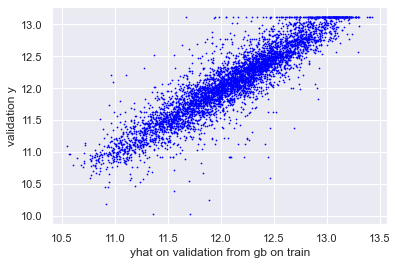

            y2      yhrf      yhgb
y2    1.000000  0.909354  0.910465
yhrf  0.909354  1.000000  0.962159
yhgb  0.910465  0.962159  1.000000
rmse: rf, gb: 0.24 0.236


'very similar !!'

In [9]:
### try boosting
gbm = GradientBoostingRegressor(learning_rate=.2,n_estimators=5000,max_depth=4)
gbm.fit(x1,y1)
yhgb = gbm.predict(x2)

## plot boosting prediction on val
plt.scatter(yhgb,y2,c='blue',s=.5)
plt.xlabel('yhat on validation from gb on train');plt.ylabel('validation y')
plt.show()

## compare boosting to rf 
yhdf = pd.DataFrame({'y2':y2,'yhrf':yhrf,'yhgb':yhgb})
print(yhdf.corr())


print('rmse: rf, gb:',myrmse(y2,yhrf),myrmse(y2,yhgb))
"very similar !!"

rmse on test from gradient boosting:  0.225


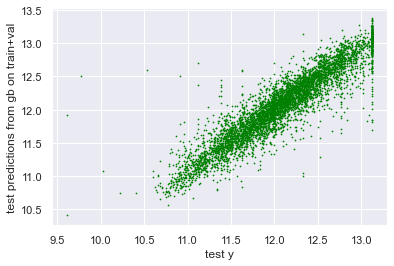

variables in order of importance: ['medianIncome' 'longitude' 'latitude' 'AveOccupancy' 'AveRooms'
 'housingMedianAge' 'AveBedrms' 'households' 'population']


In [10]:
### let's fit gb on train+val, predict on test

## use train and val data
gbm.fit(x12,y12)
yhgb3 = gbm.predict(x3)
print('rmse on test from gradient boosting: ',myrmse(y3,yhgb3))
#very similar to what we had before

## plot predictions on test
plt.scatter(y3,yhgb3,c='green',s=.5)
plt.xlabel('test y'); plt.ylabel('test predictions from gb on train+val')
plt.show()

## variable importances
fimp = gbm.feature_importances_
iifi = np.argsort(fimp)[::-1] #order (max first) of feature importances
fnms = cadat.iloc[:,:9].columns.values #feature names
print("variables in order of importance:",fnms[iifi])
# hmmm, these look different!!